<a href="https://colab.research.google.com/github/rvdrupal/Neural-Networks-and-Deep-Learning/blob/master/Pollution_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-11-12 11:17:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   413KB/s    in 0.2s    

2019-11-12 11:17:19 (413 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [0]:
df=pd.read_csv('FuelConsumption.csv')

In [0]:
df.describe()


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


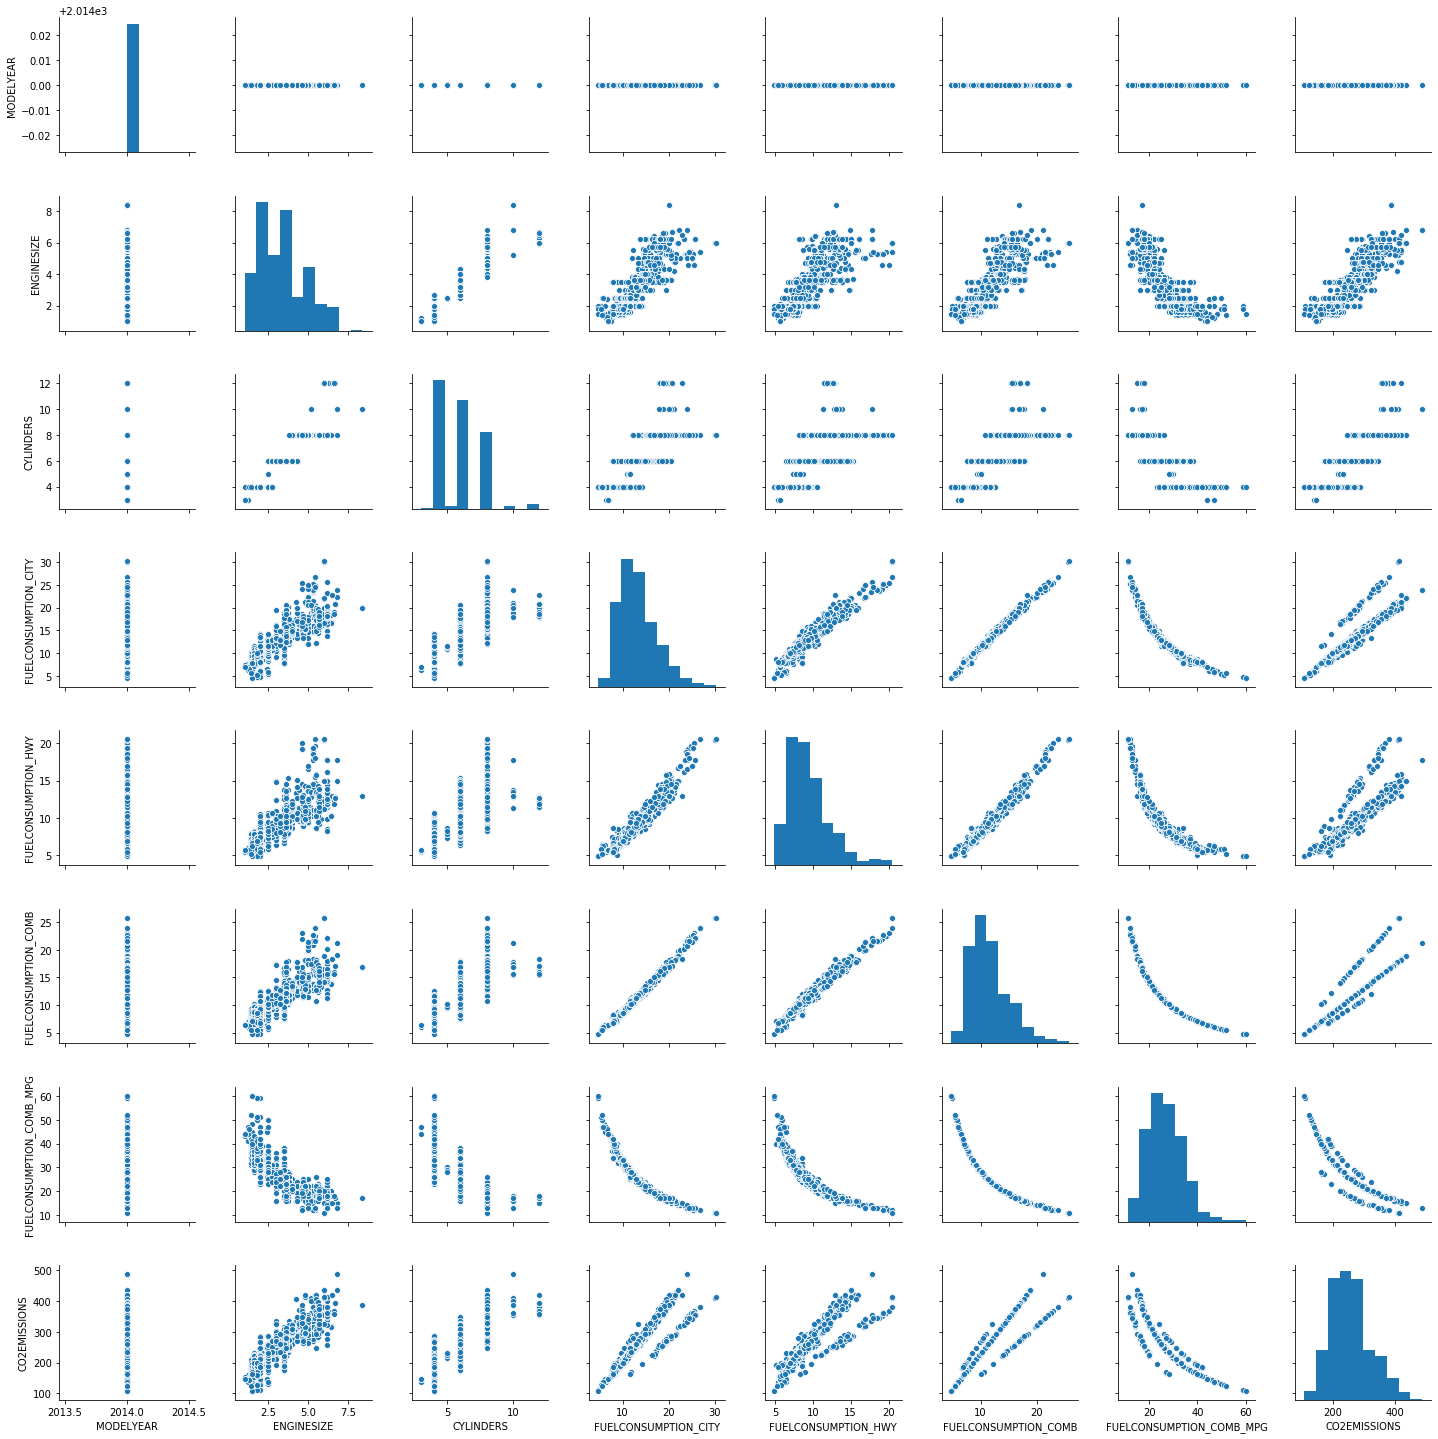

In [0]:
sns.pairplot(df)

In [0]:
cdf=df[['MODELYEAR','CYLINDERS','ENGINESIZE','CO2EMISSIONS']]
msk=np.random.rand(len(df))<.9
train=cdf[msk]
test=cdf[~msk]


In [0]:
print('train',train[:5],'\n',len(train))
print('test',test[:5],'\n',len(test))

train    MODELYEAR  CYLINDERS  ENGINESIZE  CO2EMISSIONS
0       2014          4         2.0           196
1       2014          4         2.4           221
2       2014          4         1.5           136
3       2014          6         3.5           255
5       2014          6         3.5           230 
 958
test     MODELYEAR  CYLINDERS  ENGINESIZE  CO2EMISSIONS
4        2014          6         3.5           244
7        2014          6         3.7           255
13       2014         12         5.9           359
14       2014          8         4.7           338
30       2014          6         3.0           258 
 109


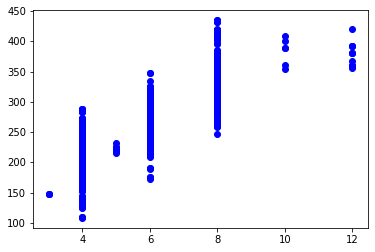

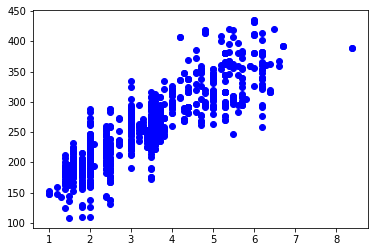

In [0]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color='blue')
plt.show()
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')

In [0]:
x_train=np.array(train['ENGINESIZE'])
y_train=np.array(train['CO2EMISSIONS'])
x_test=np.array(test['ENGINESIZE'])
y_test=np.array(test['CO2EMISSIONS'])

In [0]:
mean_x_train=np.mean(x_train)
mean_y_train=np.mean(y_train)
theta1=np.sum((x_train-mean_x_train)*(y_train-mean_y_train))/np.sum((x_train-mean_x_train)**2)
theta0=mean_y_train-theta1*mean_x_train

In [0]:

y_pred=theta0+t*x_test





In [0]:
regr=LinearRegression()
regr.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))
print(regr.score(x_test.reshape(-1,1),y_test.reshape(-1,1)))

0.7993970444313314


In [0]:
y_pred_sklearn=regr.predict(x_test.reshape(-1,1))

Text(0, 0.5, 'average_mean_Squared error')

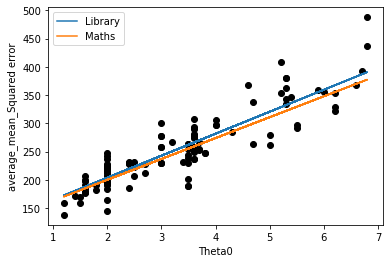

In [0]:
plt.scatter(x_test,y_test,color='black')
plt.plot(x_test,y_pred_sklearn,label='Library')
plt.plot(x_test,y_pred,label='Maths')
plt.legend()
plt.xlabel('Theta0')
plt.ylabel('average_mean_Squared error')

In [0]:
error=np.mean((y_pred-y_test)**2)/len(y_pred)
error_sklearn=np.mean((y_pred_sklearn-y_test)**2)/len(y_pred_sklearn)
print(error,error_sklearn)

8.532224124250071 69.69003900259004
